<a href="https://colab.research.google.com/github/hscrown/madatpublicdata/blob/main/freepath_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pandas

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


In [1]:
import pandas as pd

# 파일 경로 설정
file_path = 'reviews_240429.json'

# 데이터프레임으로 불러오기, lines=True 옵션 추가
data = pd.read_json(file_path, lines=True)


In [2]:
data.tail()

,User Name,Rating,URL,Review Text,Place Name,User Id,Place Id
4470,cxncnrienf288r,1,https://place.map.kakao.com/729961917,컴플레인은 중랑구청 도서관 담당하는 부서에 하면 직빵입니다. 여기다 하면 제식구 감...,중랑상봉도서관,482,159
4471,soo,5,https://place.map.kakao.com/729961917,,중랑상봉도서관,717,159
4472,ندى,5,https://place.map.kakao.com/729961917,새 건물 새 책 좋아요!,중랑상봉도서관,785,159
4473,🐰,1,https://place.map.kakao.com/729961917,도서관 문 연지 얼마 안됐을때 도서관 오후 8시에 닫는 걸로 공지되어있던데 7시 4...,중랑상봉도서관,2978,159
4474,Leeh,5,https://place.map.kakao.com/729961917,,중랑상봉도서관,272,159


In [3]:
# 결측치 확인
data.isnull().sum()

User Name      0
Rating         0
URL            0
Review Text    0
Place Name     0
User Id        0
Place Id       0
dtype: int64

In [4]:
# Review Text 값이 ("") 인 값
data[data['Review Text'] == '']

,User Name,Rating,URL,Review Text,Place Name,User Id,Place Id
5,하영래,5,https://place.map.kakao.com/8229674,,길동생태공원,2822,34
6,촌철살인,1,https://place.map.kakao.com/8229674,,길동생태공원,2653,34
13,정은정,5,https://place.map.kakao.com/8229674,,길동생태공원,2467,34
15,김준영,5,https://place.map.kakao.com/7939405,,서울대공원,1140,76
18,G.G,5,https://place.map.kakao.com/7939405,,서울대공원,141,76
...,...,...,...,...,...,...,...
4458,김운기,5,https://place.map.kakao.com/8068761,,중랑구립정보도서관,1116,158
4460,얍얍,5,https://place.map.kakao.com/8068761,,중랑구립정보도서관,2017,158
4463,판별사,5,https://place.map.kakao.com/8068761,,중랑구립정보도서관,2768,158
4471,soo,5,https://place.map.kakao.com/729961917,,중랑상봉도서관,717,159


In [5]:
# Review Text 값이 ""인 값에 0 값 넣기
data.loc[data['Review Text'] == '', 'Review Text'] = 0.0

In [6]:
# 중복 삭제
data = data.drop_duplicates()

In [7]:
# 리뷰텍스트가 0인 값 삭제
data = data[data['Review Text'] != 0.0]

In [89]:
data.reset_index(drop=True, inplace=True)

In [9]:
import re
import pandas as pd
from tqdm import tqdm


In [11]:
# !pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 67.2 MB/s eta 0:00:00


In [12]:
from konlpy.tag import Okt

In [13]:
# !pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-4zcniues
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-4zcniues
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit 103ff614a2edf6df87d289ccaf99822b9afa9a42
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.3 MB/s eta 0:00:00
  Created wheel for pykospacing: filename=pykospacing-0.5-py3-none-any.whl size=2270666 sha256=95df8014c91a410e0d7c9fa75a1d05ce6ac2cd286ef3a71fdee205509b46b65d
  Stored in directory: /tmp/pip-ephem-wheel-cache-smamvver/wheels/76/b3/33/dda14886ee76b8e53eb05580a14dfcf9145e9eb9d282c53f28
Successfully built pykospacing
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0

In [14]:
from pykospacing import Spacing

In [15]:
from collections import Counter

< 1. 한글 표현만 남기기 >
1. 리뷰에서 영어표현, puncation, 이모티콘은 모두 제거한다. (=한글 표현만 남긴다)

In [16]:
def extract_word(text):
    hangul = re.compile('[^가-힣]')
    result = hangul.sub(' ', text)
    return result

In [17]:
import re

In [18]:
print("1. Before Extraction : ", data['Review Text'][658])
print("1. After Extraction : ", extract_word(data['Review Text'][658]))
print(" ")
print("2. Before Extraction : ",data['Review Text'][4470])
print("2. After Extraction : ", extract_word(data['Review Text'][4470]))


1. Before Extraction :  밤마다 수많은 연인과 가족들이 모여 피크닉을 하며 수다를 떠는곳

곳곳 돗자리를 깔아 즐겨도 되고 캠핑용품을 펼처도 분위기 죽이는 곳

주변에는 편의점이 두개(미니스톱과 CU)나 있어 라면보충이 가능하고 배달존2도 있어 치맥도 즐길 수 있다
1. After Extraction :  밤마다 수많은 연인과 가족들이 모여 피크닉을 하며 수다를 떠는곳  곳곳 돗자리를 깔아 즐겨도 되고 캠핑용품을 펼처도 분위기 죽이는 곳  주변에는 편의점이 두개 미니스톱과    나 있어 라면보충이 가능하고 배달존 도 있어 치맥도 즐길 수 있다
 
2. Before Extraction :  컴플레인은 중랑구청 도서관 담당하는 부서에 하면 직빵입니다. 여기다 하면 제식구 감싸기 급으로 처리 될 확률이 높지요..
2. After Extraction :  컴플레인은 중랑구청 도서관 담당하는 부서에 하면 직빵입니다  여기다 하면 제식구 감싸기 급으로 처리 될 확률이 높지요  


In [19]:
data['Review'] = data['Review Text'].apply(lambda x:extract_word(x))

< 2. 띄어쓰기 고치기 >
2. 띄어쓰기 변환기를 통해 띄어쓰기가 되어있지 않은 문장들을 제대로 변환한다.
 pykospacing 모델을 사용

In [20]:
spacing = Spacing()
print("Before Fixing : ",data['Review'][658])
print("After  Fixing : ", spacing(data['Review'][658]))
print("Before Fixing : ",data['Review'][4470])
print("After  Fixing : ", spacing(data['Review'][4470]))


Before Fixing :  밤마다 수많은 연인과 가족들이 모여 피크닉을 하며 수다를 떠는곳  곳곳 돗자리를 깔아 즐겨도 되고 캠핑용품을 펼처도 분위기 죽이는 곳  주변에는 편의점이 두개 미니스톱과    나 있어 라면보충이 가능하고 배달존 도 있어 치맥도 즐길 수 있다
After  Fixing :  밤마다 수많은 연인과 가족들이 모여 피크닉을 하며 수다를 떠는 곳 곳곳 돗자리를 깔아 즐겨도 되고 캠핑용품을 펼처도 분위기 죽이는 곳 주변에는 편의점이 두개 미니스톱과 나 있어 라면 보충이 가능하고 배달 존 도 있어 치맥도 즐길 수 있다
Before Fixing :  컴플레인은 중랑구청 도서관 담당하는 부서에 하면 직빵입니다  여기다 하면 제식구 감싸기 급으로 처리 될 확률이 높지요  
After  Fixing :  컴플레인은 중랑구청 도서관 담당하는 부서에 하면 직빵입니다 여기다 하면 제 식구 감싸기 급으로 처리 될 확률이 높지요


<3.형태소분석>
3. 형태소 분석기를 통해 각각의 리뷰를 형태소 단위로 분리한다.

In [21]:
okt = Okt()
words = " ".join(data['Review'].tolist())
words = okt.morphs(words,stem=True)

In [22]:
len(words)

63620

< 4. 한 글자, 불용어 제거 >

In [23]:
remove_one_word = [x for x in words if len(x)>1 or x=="새"]
len(remove_one_word)

44262

In [24]:
from collections import Counter
frequent = Counter(remove_one_word).most_common()


In [25]:
print(frequent)

[('하다', 2162), ('좋다', 1496), ('있다', 1060), ('너무', 503), ('보다', 494), ('많다', 475), ('도서관', 454), ('이다', 384), ('없다', 364), ('으로', 354), ('에서', 325), ('가다', 312), ('되다', 295), ('전시', 293), ('사람', 290), ('아이', 277), ('자다', 249), ('않다', 248), ('공원', 244), ('시간', 226), ('같다', 225), ('오다', 211), ('하고', 202), ('직원', 188), ('아니다', 185), ('되어다', 175), ('공간', 171), ('시설', 167), ('산책', 156), ('열람', 148), ('생각', 146), ('정말', 145), ('작품', 138), ('이용', 136), ('많이', 129), ('들다', 128), ('방문', 125), ('관람', 120), ('최고', 119), ('까지', 118), ('친절하다', 113), ('박물관', 109), ('공부', 109), ('해주다', 108), ('걷기', 98), ('주차', 97), ('좋아하다', 96), ('서울', 96), ('에는', 95), ('크다', 93), ('한강', 90), ('여기', 89), ('넓다', 88), ('보고', 86), ('분들', 84), ('가보다', 84), ('다른', 83), ('운영', 82), ('정도', 82), ('모르다', 81), ('조용하다', 80), ('그렇다', 80), ('이라', 79), ('장소', 79), ('싶다', 79), ('이렇다', 78), ('안되다', 78), ('아쉽다', 76), ('인데', 76), ('받다', 76), ('체험', 75), ('건물', 75), ('관리', 74), ('나오다', 73), ('진짜', 73), ('역사', 72), ('무료', 71), ('이나', 70)

In [26]:
!file -bi https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt

cannot open `https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt' (No such file or directory)


In [27]:
with open('stopwords.txt', 'r', encoding='cp949') as f:
    list_file = f.readlines()
stopwords = list_file[0].split(",")
remove_stopwords = [x for x in remove_one_word if x not in stopwords]
len(remove_stopwords)


30672

In [ ]:
# Counter(remove_stopwords).most_common()

< 6. 최소 횟수 이하 단어 제거 >
6. 최소빈도수 이하의 것들은 제거한다.

In [ ]:
# # 최소빈도수 이하 단어들 출력
# one_word = []
# for item, count in Counter(remove_stopwords).most_common():
#     if count==1:
#         # one_word.append(item)

In [ ]:
# # 리스트를 csv 파일로 저장 # ,로 구분

# import pandas as pd
# df = pd.DataFrame(one_word)
# df.to_csv('one_word.csv', index=False, header=False, encoding='cp949', mode='w', sep=',')

In [28]:
import pandas as pd
import re
from konlpy.tag import Okt
import time

def save_and_load(dataframe):
    #"""데이터프레임을 저장하고 불러온 뒤, 결측치와 중복을 제거합니다."""
    basepath = 'data/'
    dataframe.to_csv(basepath + 'review.csv', index=False)
    df = pd.read_csv(basepath + 'review.csv')
    df = df.dropna()
    df = df.drop_duplicates()
    df = df.reset_index(drop=True)
    return df

def load_stopwords():
    #"""불용어 목록을 불러옵니다."""
    with open('data/stopwords.txt', 'r', encoding='cp949') as f:
        list_file = f.readlines()
    return list_file[0].split(",")

def extract_word(text):
    #"""텍스트에서 한글만 추출합니다."""
    hangul = re.compile('[^가-힣]')
    result = hangul.sub(' ', text)
    return result

def make_wordlist(reviews, stopwords):
    #"""리뷰 데이터에서 불용어를 제거하고, 유의미한 단어만 필터링하여 리스트를 생성합니다."""
    #print("리뷰들을 모아 분석하는 중입니다.....")
    #print("데이터 정제 중....")
    words = " ".join([extract_word(review) for review in reviews])
    #print("형태소 추출 중....")
    okt = Okt()
    words = okt.morphs(words, stem=True)
    #print("한글자 제거 중....")
    words = [word for word in words if len(word) > 1 or word == '곳']
    #print("불용어 제거 중....")
    words = [word for word in words if word not in stopwords]
    #print("의미있는 단어리스트 생성 중....")
    time.sleep(1)
    minimum_count = 1
    final = []
    for word in tqdm(set(words)):  # 중복을 제거한 후 진행
        if words.count(word) >= minimum_count:
            final.append(word)
    return final

def preprocess(text, word_list):
   # """텍스트 데이터를 전처리하여 형태소 단위로 분리하고, 필터링된 단어 리스트에 포함된 단어만을 반환합니다."""
    text = extract_word(text)
    okt = Okt()
    morphs = okt.morphs(text, stem=True)
    filtered_text = [morph for morph in morphs if morph in word_list]
    return filtered_text


In [29]:
word_list = make_wordlist(" ".join(data['Review'].tolist()), stopwords)

100%|██████████| 126/126 [00:00<00:00, 2574.99it/s]


In [37]:
data['Review'][310]


'걷기좋은 명소였습니다'

(5)전처리끝

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
# CountVectorizer를 사용하여 피처 벡터화 #30분소요 gpu로
vectorizer = CountVectorizer(tokenizer=lambda x: make_wordlist([x], stopwords))

In [40]:
data_features = vectorizer.fit_transform(data['Review'].tolist())

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
100%|██████████| 3/3 [00:00<00:00, 33112.93it/s]
0it [00:00, ?it/s]
100%|██████████| 3/3 [00:00<00:00, 36157.79it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 14768.68it/s]
0it [00:00, ?it/s]
100%|██████████| 4/4 [00:00<00:00, 49784.02it/s]
0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 103307.98it/s]
0it [00:00, ?it/s]
100%|██████████| 9/9 [00:00<00:00, 102857.59it/s]
0it [00:00, ?it/s]
100%|██████████| 2/2 [00:00<00:00, 32388.45it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 12905.55it/s]
0it [00:00, ?it/s]
100%|██████████| 8/8 [00:00<00:00, 92436.45it/s]
0it [00:00, ?it/s]
100%|██████████| 3/3 [00:00<00:00, 50131.12it/s]
0it [00:00, ?it/s]
100%|██████████| 3/3 [00:00<00:00, 30541.05it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 15087.42it/s]
0it [00:00,

In [41]:
list_of_word = vectorizer.get_feature_names_out()

In [42]:
# list_of_word 피클로 저장
import pickle
with open('list_of_word.pkl', 'wb') as f:
    pickle.dump(list_of_word, f)

In [43]:
count_list = data_features.toarray().sum(axis=0)

In [44]:
# count_list 피클로 저장
with open('count_list.pkl', 'wb') as f:
    pickle.dump(count_list, f)

In [45]:
count_list

array([ 9, 37,  1, ..., 38,  2,  1])

In [46]:
list_of_word

array(['가게', '가격', '가격표', ..., '힘들다', '힘쓰다', '힝힝'], dtype=object)

In [47]:
word_count_dict = dict(zip(word_list, count_list))

In [48]:
data_features[0]

<1x5896 sparse matrix of type '<class 'numpy.int64'>'
	with 84 stored elements in Compressed Sparse Row format>

<1x5896 sparse matrix of type '<class 'numpy.int64'>'
	with 84 stored elements in Compressed Sparse Row format>

  1*5896배열 중에, 본 리뷰가 가지고 있던 형태소가 의미하는 위치에 1이 표시되어있을 것이다.

1인것들의 인덱스를 뽑아보자

In [49]:
index = []
i = 0
for x in data_features.toarray()[0]:
    if x==1:
        index.append(i)
    i = i+1

In [51]:
# index

이 인덱스의 해당하는 단어들을 list_of_words 에서 찾는다.

In [54]:
index1_list_of_words = [list_of_word[x] for x in index]

tf-idf 수행

In [55]:
from sklearn.feature_extraction.text import TfidfTransformer

In [56]:
tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(data_features)

인덱스와 매칭된 단어확인

In [ ]:
# vectorizer.vocabulary_

In [57]:
# 각인덱스와 단어 매칭
invert_index_vectorizer = {v: k for k, v in vectorizer.vocabulary_.items()}

In [58]:
data[data['Rating']==2]

,User Name,Rating,URL,Review Text,Place Name,User Id,Place Id,Review
93,KJH,2,https://place.map.kakao.com/7939405,빨간날 오후에는 가지마세요\n주차장에서 한시간동안 자리찾다가 지쳐서 떠났습니다\n만...,서울대공원,238,76,빨간날 오후에는 가지마세요 주차장에서 한시간동안 자리찾다가 지쳐서 떠났습니다 만차인...
103,김준,2,https://place.map.kakao.com/7939405,시설이 좋고 잘 꾸며져 있지만(내부는 정말 만족) 대행 맡길 이유가 1도 없어 보이...,서울대공원,1138,76,시설이 좋고 잘 꾸며져 있지만 내부는 정말 만족 대행 맡길 이유가 도 없어 보이...
126,What's your name,2,https://place.map.kakao.com/7939405,동물들이 하나같이 다 우울해보이고 관리가 잘 안되고 있는듯한 느낌이 너무 강하더라..,서울대공원,409,76,동물들이 하나같이 다 우울해보이고 관리가 잘 안되고 있는듯한 느낌이 너무 강하더라
183,기록용,2,https://place.map.kakao.com/11331488,밤엔 볼 게 없다. 낮에 다시 와 볼 기회가 생기면 좋겠군!,서울숲,1019,81,밤엔 볼 게 없다 낮에 다시 와 볼 기회가 생기면 좋겠군
191,까꿍아빠,2,https://place.map.kakao.com/11331488,걷기좋은 산책로가 있지만 자전거 윤행에는 각박해요. 다른 나라의 도심 공원은 자전거...,서울숲,1192,81,걷기좋은 산책로가 있지만 자전거 윤행에는 각박해요 다른 나라의 도심 공원은 자전거...
...,...,...,...,...,...,...,...,...
4289,.,2,https://place.map.kakao.com/8512798,식당 맛없음. 개선 의지 부족함. \n 그리고 공부하러 한번 가면 밥을 먹어야하는데...,은평구립도서관,17,144,식당 맛없음 개선 의지 부족함 그리고 공부하러 한번 가면 밥을 먹어야하는데 ...
4296,즐겨찾기,2,https://place.map.kakao.com/8512798,식당 별로에요,은평구립도서관,2566,144,식당 별로에요
4352,가츠,2,https://place.map.kakao.com/13028509,코로나 확진자 나온곳. 학습실 내에 마스크 미착용을 너무 단속안한다. 아예 벗고서 ...,서울특별시교육청정독도서관,891,103,코로나 확진자 나온곳 학습실 내에 마스크 미착용을 너무 단속안한다 아예 벗고서 ...
4438,eee,2,https://place.map.kakao.com/12441528,여기 빌런 있음.. 막 사람들에게 소리지르고 문도 양보하려는데 밀침.....,서울도서관,503,78,여기 빌런 있음 막 사람들에게 소리지르고 문도 양보하려는데 밀침


리뷰의 키워드만 담은 'Keyword' 칼럼 만들기

12 를 부정, 345를 긍정키워드로 매핑

In [59]:
feeling = [0 if rank in range(0,2) else 1 for rank in data['Rating']] # 평점이 1,2면 0(부정)으로 매핑, 3,4,5면 1(긍정)으로 매핑
data['P/N'] = feeling

In [90]:
# 긍정 부정 리뷰 비율
data['P/N'].value_counts() # 1: 2681 2:342 긍정이 압도적으로 많다.

P/N
1    2681
0     342
Name: count, dtype: int64

In [91]:
# 긍정 단어와 부정 단어 갯수를 맞춰준다
min_cnt = min(data['P/N'].value_counts().tolist())
positive_random_idx = data[data['P/N']==1].sample(min_cnt, random_state=40).index.tolist()
negative_random_idx = data[data['P/N']==0].sample(min_cnt, random_state=40).index.tolist()
# min_cnt는 긍정/부정 갯수 중 작은 값을 가져오고, 이 개수에 맞게 긍정/부정 데이터를 샘플링 한다.

# Logistic Regression

In [92]:
# 정확한 유사도 측정을 위해 긍정과 부정단어의 랜덤으로 인덱스를 붙여서 인덱스를 섞어준다
import random
random_idx = positive_random_idx + negative_random_idx
random.shuffle(random_idx)

In [93]:
# 이 index에 맞는 tf_idf벡터를 x값로, 긍부정 라벨을 y값으로 함
x = tf_idf_vect[random_idx]
y = data['P/N'][random_idx]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)으로 훈련/테스트 데이터를 만들지 않는 이유는 뭘까?

이 모델을 학습시켜서 무언가를 예측하는 것에 목표가 있었다면 훈련/테스트 데이터셋을 나눠서 성능비교를 했었겠지만, 우리의 목표는 이 모델이 긍정/부정에 대해 분류된 데이터를 학습하고 어느 것에 중요도가 있었는지 확인하기 위함이므로 전체데이터를 로지스틱회귀모델에 입력시킨다.

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [95]:
model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

In [96]:
y_pred = model.predict(x)
print('accuracy: %.2f' % accuracy_score(y, y_pred))
print('precision: %.2f' % precision_score(y, y_pred))
print('recall: %.2f' % recall_score(y, y_pred))
print('F1: %.2f' % f1_score(y, y_pred))

accuracy: 0.95
precision: 0.98
recall: 0.93
F1: 0.95


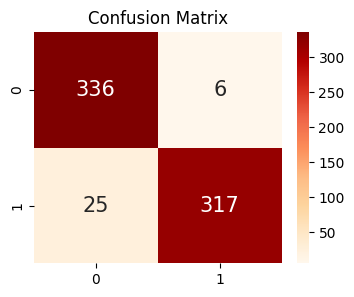

In [97]:
# confusion matrix 시각화
import seaborn as sns
import matplotlib.pyplot as plt
confu = confusion_matrix(y_true = y, y_pred = y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

# 키워드 분석

로지스틱 회귀 모델의 coef속성으로 어떤 단어들이 중요도가 있었는지 파악. 긍정에는 어떤 단어들이 있었는지, 부정에는 어떤 단어들이 있었는지.

In [98]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(model.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(model.coef_[0])), reverse = False)

In [99]:
# 긍정(평점 3,4 또는 5)쪽에서 중요도가 높았던 10가지 단어
for coef in coef_pos_index[:10]:
    print(invert_index_vectorizer[coef[1]], coef[0])

좋다 4.150738356447651
최고 1.7513912525194468
많다 1.2558107733278152
산책 1.163503044419639
친절하다 1.069689513751227
멋지다 0.9765250071883604
감사하다 0.9672289127758148
자다 0.8924557689943136
이쁘다 0.8575039422999019
곳 0.8529793237241237


In [100]:
# 부정(평점 1 또는 2)쪽에서 중요도가 높았던 10가지 단어
for coef in coef_neg_index[:10]:
    print(invert_index_vectorizer[coef[1]], coef[0])

사람 -1.6032737516685505
직원 -1.3663725998571417
최악 -1.3578628986346355
불친절하다 -1.0325440109974746
시끄럽다 -0.9548077985535902
불편하다 -0.930366270645336
만들다 -0.8852858268048552
동물 -0.8698418437230147
냄새 -0.8399569997209241
관리 -0.8352029313138064


In [102]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 3.3 MB/s eta 0:00:00


In [104]:
coef_pos_dict = {coef[1]: coef[0] for coef in coef_pos_index}
coef_neg_dict = {coef[1]: coef[0] for coef in coef_neg_index}

In [175]:
coef_pos_dict

{4606: 4.150738356447651,
 5029: 1.7513912525194468,
 1641: 1.2558107733278152,
 2549: 1.163503044419639,
 5116: 1.069689513751227,
 1722: 0.9765250071883604,
 102: 0.9672289127758148,
 4215: 0.8924557689943136,
 4031: 0.8575039422999019,
 380: 0.8529793237241237,
 1813: 0.8226399356994069,
 943: 0.8009897895195288,
 1070: 0.7822644632418719,
 414: 0.763354443953275,
 5576: 0.720304255840802,
 775: 0.6938634980366087,
 651: 0.680683627396029,
 2152: 0.6522510205238242,
 240: 0.6477639752497579,
 1638: 0.6279939594430881,
 1035: 0.6196065487639915,
 3224: 0.5951126190195344,
 3190: 0.5795056346257609,
 4704: 0.5746745489258375,
 2335: 0.5646895333689186,
 2527: 0.539389899429227,
 2632: 0.5330958522528499,
 4352: 0.5242997859244304,
 5479: 0.5185106047961048,
 5415: 0.5182181711172538,
 2056: 0.5156319803020731,
 4634: 0.5135716056370574,
 4237: 0.5134994335511482,
 1986: 0.5040366980195968,
 4628: 0.47582980529848823,
 1169: 0.4746461172717175,
 1685: 0.4745589112724781,
 5846: 0.47444

In [176]:
# coef_post_dict 에서 밸류값이 큰 순서대로 정렬
coef_pos_dict = {k: v for k, v in sorted(coef_pos_dict.items(), key=lambda item: item[1], reverse=True)}
# coef_pos_dict 에서 키 값을 단어로 변환
coef_pos_dict = {invert_index_vectorizer[k]: v for k, v in coef_pos_dict.items()}
coef_pos_dict

{'좋다': 4.150738356447651,
 '최고': 1.7513912525194468,
 '많다': 1.2558107733278152,
 '산책': 1.163503044419639,
 '친절하다': 1.069689513751227,
 '멋지다': 0.9765250071883604,
 '감사하다': 0.9672289127758148,
 '자다': 0.8924557689943136,
 '이쁘다': 0.8575039422999019,
 '곳': 0.8529793237241237,
 '무료': 0.8226399356994069,
 '넓다': 0.8009897895195288,
 '다양하다': 0.7822644632418719,
 '공원': 0.763354443953275,
 '한강': 0.720304255840802,
 '깨끗하다': 0.6938634980366087,
 '근처': 0.680683627396029,
 '벚꽃': 0.6522510205238242,
 '걷기': 0.6477639752497579,
 '만해': 0.6279939594430881,
 '느낌': 0.6196065487639915,
 '아주': 0.5951126190195344,
 '아름답다': 0.5795056346257609,
 '즐기다': 0.5746745489258375,
 '분위기': 0.5646895333689186,
 '사진': 0.539389899429227,
 '생각': 0.5330958522528499,
 '재밌다': 0.5242997859244304,
 '풍경': 0.5185106047961048,
 '편하다': 0.5182181711172538,
 '방문': 0.5156319803020731,
 '주변': 0.5135716056370574,
 '자연': 0.5134994335511482,
 '박물관': 0.5040366980195968,
 '주말': 0.47582980529848823,
 '대요': 0.4746461172717175,
 '매점': 0.474558911

In [134]:
# coef_pos_dict의 밸류로 리스트 생성
coef_pos_list = list(coef_pos_dict.values())


In [174]:
# Place Id로 그룹화 후 Review 합치기
grouped_reviews = data.groupby('Place Id')['Review'].apply(' '.join).reset_index()

print(grouped_reviews)

     Place Id                                             Review
0           0  설명 잘해주심  알차게 잘 구성해놨어요  서울시공공서비스예약 사이트에서 해설 신청하...
1           1  공간도 넓고 정책 관련 도서도 많아요  자연과학열람터는 주말에는 열리지 않아요  사...
2           2  좋아요 책도 많고 깨끗합니다 웬만한 스카보다 좋음 넓고 좋다  주차장이 최악임  들...
3           3  장서량이 많지는 않지만 책보기 어려운 현대인에게 한줄기 빛 공공도서관은 사랑입니다 ...
4           4                                  아담한 도서관 있을껀 다 있어요
..        ...                                                ...
169       173                    산    좋아   한적하니 좋아요 강아지산책시키기 좋아요
170       174  두번째 방문 아이들이 직접 혈자리도 눌러보고 퀴즈도 풀어보는등 다양한 체험이 가능해...
171       175  나중에 또 방문해서 해설사님 설명들으며 관람해보려구요  그냥 아담했음   옛집 속으...
172       176          현재기준 리모델링 중이라서 사용 불가  층에 주식하면서 전화 엄청 하...
173       177  내최애 작가 환기님과 향안여사님을 뵙다   도판으론 알수없다는 환기님의 작품 실물을...

[174 rows x 2 columns]


In [776]:
# 키워드 범주화
priority_keywords = {
    '활동성': {'산책', '걷기', '여행', '구경', '공부', '시험', '재미', '전망', '체험','전시','힐링','산','야경','뷰','야외','방탈출'},
    '대상': {'친구', '연인', '가족', '강아지','데이트','고딩','초딩','아동','아이'},
    '분위기': {'친절하다','아름답다','편안하다','고요하다', '이쁘다', '예쁘다','정겨운','고요','평화','깨끗','꿈','멋지다','깨끗하다','여름','봄','겨울','가을', '추억', '만족', '친절','집중', '정이','좋다','사랑','한적','넓다','아담하다','추천'},
    '접근성': {'할인', '무료','예약','취식','휴게실'},
    '편의시설': {'콘센트','에어컨','와이파이', '열람실','독서실','편이','시설'}}


# 추가적으로 제외할 키워드
excluded_keywords = {'년도','생각', '준비','느낌','구성', '빵빵', '골반', '리뉴','추석', '등록', '주시', '방법', '맨날','나머진','에만','설명','그거','중이','무량수전','차끌', '년전', '화중', '가기','실쪽','기준','거처', '에서도','저서', '무량','있어요','최순우','로는','자주','분들', '발권','연휴', '인상','그대로', '물어', '일만', '멀리', '워낙','종종','엄한놈','아줌마', '패스', '엿같','한도', '가면', '수고', '퇴실', '모로코','아주', '가끔', '가도','가능','감사','무척','특성', '많다', '만해', '있을껀', '근처', '되게', '장소', '미정', '랍니', '진짜진짜', '방문', '가능'}

# 모든 키워드를 하나의 세트로 병합
all_priority_keywords = set()
for keywords in priority_keywords.values():
    all_priority_keywords.update(keywords)

# 키워드 추출 함수
def extract_keywords(text):
    tokens = okt.morphs(text)
    # 키워드 필터링
    filtered_tokens = [token for token in tokens if token not in stopwords and len(token) > 1 and token not in excluded_keywords]
    # 우선순위 키워드 필터링
    priority_tokens = [token for token in filtered_tokens if token in all_priority_keywords or token in coef_pos_dict or token in coef_neg_dict]
    priority_tokens = list(set(priority_tokens))  # 중복 제거

    # '좋다'를 '좋아요'로 변경
    if '좋다' in priority_tokens:
        priority_tokens[priority_tokens.index('좋다')] = '좋아요'
    if '정이' in priority_tokens:
        priority_tokens[priority_tokens.index('정이')] = '정'
    if '아담한' in priority_tokens:
        priority_tokens[priority_tokens.index('아담한')] = '아담하다'
    if '한적하니' in priority_tokens:
        priority_tokens[priority_tokens.index('한적하니')] = '한적하다'
    if '편이' in priority_tokens:
        priority_tokens[priority_tokens.index('편이')] = '편의시설'
    if '시설' in priority_tokens:
        priority_tokens[priority_tokens.index('시설')] = '편의시설'



    # 결과가 5개 미만이면 추가 선택
    if len(priority_tokens) < 5 and filtered_tokens:
        additional_tokens = random.sample(filtered_tokens, min(5 - len(priority_tokens), len(filtered_tokens)))  # 필요한 개수만큼 랜덤 선택
        priority_tokens += additional_tokens

    # 결과가 5개 초과이면 최상위 5개만 선택
    if len(priority_tokens) > 5:
        priority_tokens = sorted(priority_tokens, key=lambda x: (x in all_priority_keywords, coef_pos_dict.get(x, 0), coef_neg_dict.get(x, 0)), reverse=True)[:5]

    return priority_tokens

# 리뷰 데이터 프레임에 키워드 칼럼 추가
grouped_reviews['Keyword'] = grouped_reviews['Review'].apply(extract_keywords)

print(grouped_reviews)


     Place Id                                             Review  \
0           0  설명 잘해주심  알차게 잘 구성해놨어요  서울시공공서비스예약 사이트에서 해설 신청하...   
1           1  공간도 넓고 정책 관련 도서도 많아요  자연과학열람터는 주말에는 열리지 않아요  사...   
2           2  좋아요 책도 많고 깨끗합니다 웬만한 스카보다 좋음 넓고 좋다  주차장이 최악임  들...   
3           3  장서량이 많지는 않지만 책보기 어려운 현대인에게 한줄기 빛 공공도서관은 사랑입니다 ...   
4           4                                  아담한 도서관 있을껀 다 있어요   
..        ...                                                ...   
169       173                    산    좋아   한적하니 좋아요 강아지산책시키기 좋아요   
170       174  두번째 방문 아이들이 직접 혈자리도 눌러보고 퀴즈도 풀어보는등 다양한 체험이 가능해...   
171       175  나중에 또 방문해서 해설사님 설명들으며 관람해보려구요  그냥 아담했음   옛집 속으...   
172       176          현재기준 리모델링 중이라서 사용 불가  층에 주식하면서 전화 엄청 하...   
173       177  내최애 작가 환기님과 향안여사님을 뵙다   도판으론 알수없다는 환기님의 작품 실물을...   

                      Keyword  
0      [전시, 예약, 박물관, 특별, 사이트]  
1       [산책, 공부, 시험, 예약, 분위기]  
2      [독서실, 카페, 상태, 좋아요, 불만]  
3       [사랑, 공부, 집중, 독서실, 최고]  
4             [도서관, 도서관

In [778]:
grouped_reviews.sample(10)

,Place Id,Review,Keyword
78,80,층 카페 최악이네요 다른리뷰 보니 친절하다 맛있다하는데 주인이 바뀐건가 퉁명스럽고...,"[친절하다, 무료, 전시, 구경, 체험]"
43,45,디뮤지엄만 가다 오랜만에 대림오니 옛날 생각나고 좋았다 재즈 진수영 공연은 놓쳐서...,"[전시, 사랑, 추억, 재미, 구경]"
76,78,아저씨너무많아 여기 빌런 있음 막 사람들에게 소리지르고 문도 양보하려는데 밀침...,"[에어컨, 식당, 건물, 아저씨, 가동]"
110,114,사서분들이 친절하고 책 추천도 많은 곳입니다 좀 작지만 정이 묻어나는 느낌이라 좋...,"[추천, 어른, 핸드폰, 놀이터, 정]"
20,20,둘째 네째 화요일 휴관이니 주의하세요 전망 좋고 운영 좋움 단지 종합자료실 클래...,"[가을, 데이트, 전망, 한강, 분위기]"
59,61,무척 친절하고 공간이 많이 넓진않은데 깔끔하게 전시되있어요 근데 왜 관람이 유료인...,"[무료, 전시, 체험, 예약, 박물관]"
24,24,너무 언덕에 있다곤 생각하지만 특색 있고 좋았어요 특히나 어린이청소년도서관답게 어린...,"[전시, 공부, 예약, 공원, 프로그램]"
126,130,작고 아이들을 위한 도서관이지만 높은 곳에 위치해 있으니 오실 때 큰 맘 먹고 오셔...,"[여름, 겨울, 유아, 내부, 독서]"
9,9,고양이가지금도살아있는지궁금하네요 우리동네 꼭 필요한 깨끗한 도서관 요즘 귀한 열...,"[공부, 콘센트, 예약, 규모, 필수]"
73,75,이번 특별전 무지 재밌어요 아이들 뿐만 아니라 어른들도 흥미롭게 볼만한 전시였습니...,"[무료, 전시, 특별, 어른, 시도]"


In [779]:
# csv파일로 저장
grouped_reviews.to_csv('keywords_reviews.csv', index=False, encoding='utf-8')

In [780]:
# json파일로 저장
grouped_reviews.to_json('keywords_reviews.json', orient='records')

In [ ]:
# place id 26 리뷰없음 # id 4 리뷰 부족